In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import pdist
from mpl_toolkits import mplot3d
from scipy.signal import welch, fftconvolve
import time
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig, solve_banded

#use scipy as needed

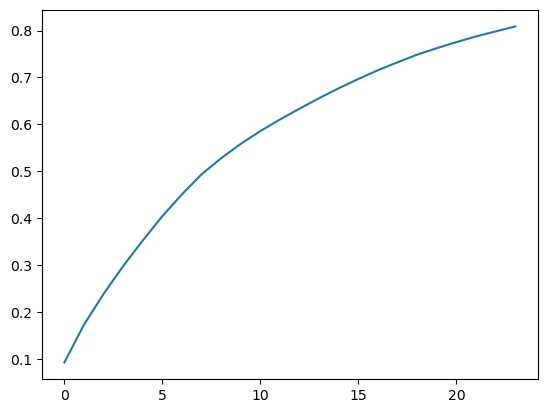

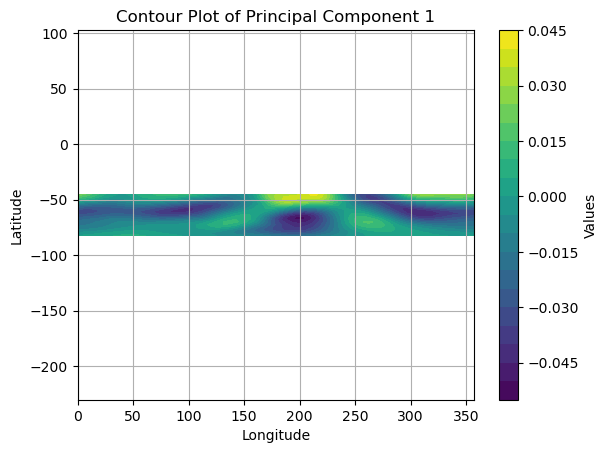

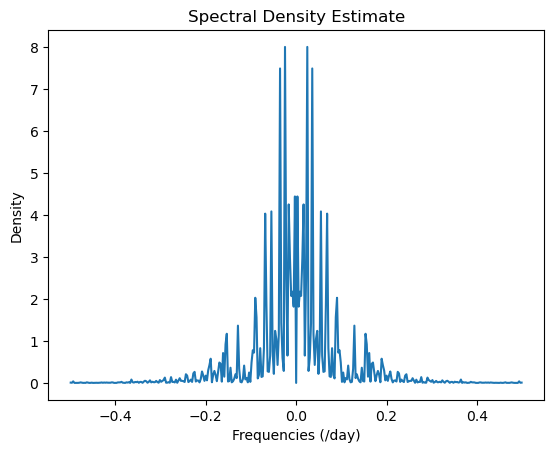

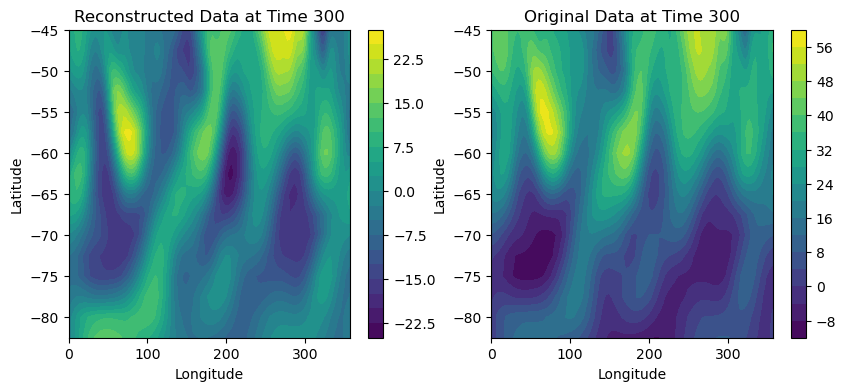

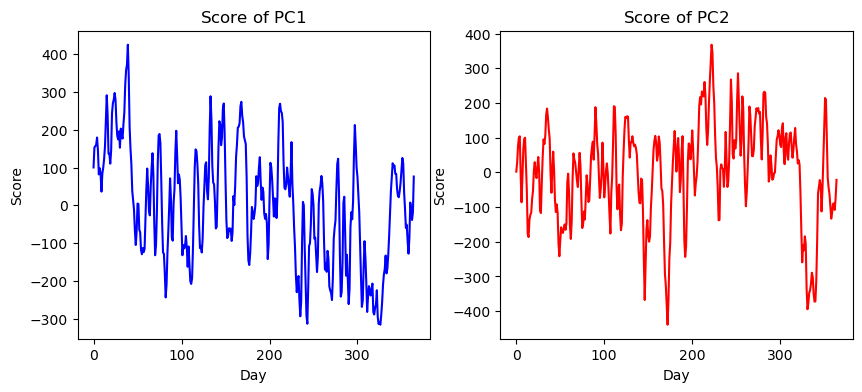

In [10]:

def plot_field(lat,lon,u,time,levels=20):
    """
    Generate contour plot of u at particular time
    Use if/as needed
    Input:
    lat,lon: latitude and longitude arrays
    u: full array of wind speed data
    time: time at which wind speed will be plotted (index between 0 and 364)
    levels: number of contour levels in plot
    """
    plt.figure()
    plt.contourf(lon,lat,u[time,:,:],levels)
    plt.axis('equal')
    plt.grid()
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    
    return None


def part1():#add input if needed
    """
    Code for part 1
    """ 

    #--- load data ---#
    d = np.load('data1.npz')
    lat = d['lat'];lon = d['lon'];u=d['u']
    #-------------------------------------#

    #Add code here 
    
    A = u.reshape(u.shape[0], -1).T
    mean_wind = np.mean(A, axis=1)
    # Create data maatrix
    A_standardised = A.T-mean_wind 
    # Do SVD
    U, S, WT = np.linalg.svd(A_standardised)
    T = U.T
    Anew = np.matmul(T, A_standardised)
    m,n = A.shape[0], A.shape[1]
    
   
    var_ratio = S**2 / np.sum(S**2)
    cum_var = np.cumsum(var_ratio)
    plt.plot(cum_var[:24])
    plt.show()
    # Find Covariance matrix
    C = 1.0/(len(A_standardised)-1) * np.dot(A_standardised.T, A_standardised)
    # Similar to SVD, testing new method to find components - find evecs of Cov matrix directly
    # Compute eigenvalues and eigenvectors using the eigsh scipy function
    eigenvalues, eigenvectors = eigsh(C,241, which="LM", return_eigenvectors=True) 

    # Sorting the eigenvectors and eigenvalues from largest to smallest eigenvalue
    sorted_index = np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[sorted_index]
    eigenvectors=eigenvectors[:,sorted_index]
    pc1 = np.array([eigenvectors[:, 0].reshape((16,144))])
    # Contour of PC1
    contour = plot_field(lat,lon,pc1,0)
    # Add a colorbar to show the mapping
    plt.colorbar(contour, label='Values')

    # Show the plot
    plt.title('Contour Plot of Principal Component 1')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    

   
    average_365 = np.sum(np.sum(u[:, -6:, -60:], axis=1), axis=1)/2304
    frequencies = np.fft.fftfreq(365, d=1)
    # calculate Fourier transform of data points
    # print(frequencies)
    fft_vals = np.fft.fft(average_365-np.mean(average_365))
    
    p_gram = np.abs(fft_vals) ** 2 / 365
    # Reorder periodogram and frequencies to get 0th frequency in the center
    p_gram_shifted = np.fft.fftshift(p_gram)
    frequencies_shifted = np.fft.fftshift(frequencies)
    plt.plot(frequencies_shifted,p_gram_shifted)
    # plt.vlines(1/144, 0, 0.08, 'r')
    # plt.vlines(-1/30, 0, 300, 'r')
    plt.title("Spectral Density Estimate")
    plt.xlabel("Frequencies (/day)")
    plt.ylabel("Density")
    plt.show()

    # Reconstruct the data matrix using components
    A_pca = np.dot(A_standardised, eigenvectors)
    A_reconstructed = np.dot(A_pca, eigenvectors.T)
    # print(np.argsort(np.abs(np.dot(A_standardised, eigenvectors))[:,0])[-10:])
    k=300
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(lon, lat, A_reconstructed[k].reshape(u.shape[1:]),levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Reconstructed Data at Time {}'.format(k))
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.contourf(lon, lat, u[k],levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Original Data at Time {}'.format(k))
    plt.colorbar()

part1()

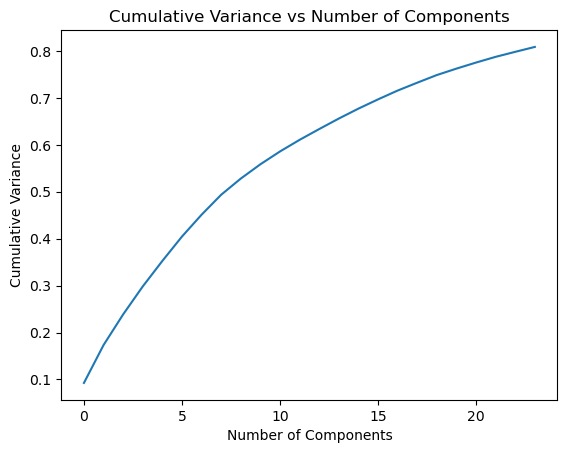

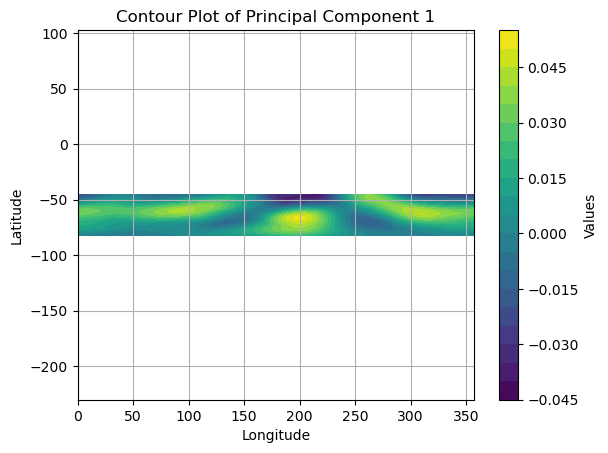

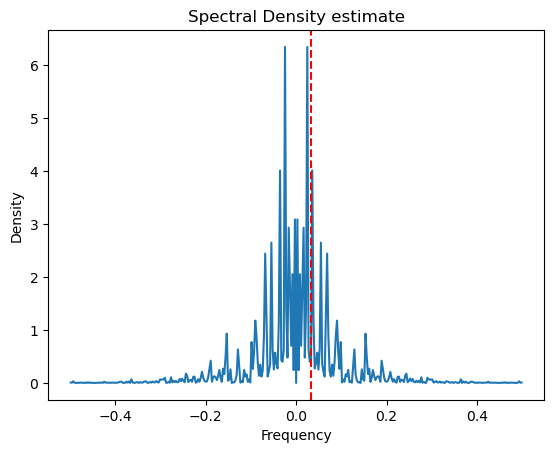

(365, 2304)
(2304, 365)
4157.918568813614


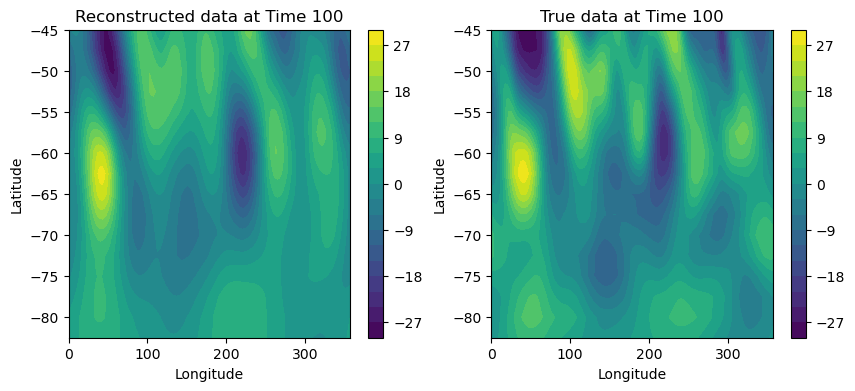

In [87]:

def plot_field(lat,lon,u,time,levels=20):
    """
    Generate contour plot of u at particular time
    Use if/as needed
    Input:
    lat,lon: latitude and longitude arrays
    u: full array of wind speed data
    time: time at which wind speed will be plotted (index between 0 and 364)
    levels: number of contour levels in plot
    """
    plt.figure()
    plt.contourf(lon,lat,u[time,:,:],levels)
    plt.axis('equal')
    plt.grid()
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    
    return None


def part1():#add input if needed
    """
    Code for part 1
    """ 

    #--- load data ---#
    d = np.load('data1.npz')
    lat = d['lat'];lon = d['lon'];u=d['u']
    #-------------------------------------#

    #Add code here 
    
    A = u.reshape(u.shape[0], -1).T
    wind_mn = np.mean(A, axis=1)
    #Create data matrix
    A_center = A.T-wind_mn 
    #SVD
    U, S, WT = np.linalg.svd(A_center)
    T = U.T
    
    var_ratio = S**2 / np.sum(S**2)
    cum_var = np.cumsum(var_ratio)
    plt.plot(cum_var[:24])
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Variance")
    plt.title("Cumulative Variance vs Number of Components")
    #plt.savefig("cum_var.png")
    plt.show()
    #Covariance matrix
    C = 1.0/(len(A_center)-1) * np.dot(A_center.T, A_center)
    #Compute evals and evecs
    eigenvalues, eigenvectors = eigsh(C,24, which="LM", return_eigenvectors=True) 

    # Sorting evals and evecs by size
    sorted_ind = np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[sorted_ind]
    eigenvectors=eigenvectors[:,sorted_ind]
    pc1 = np.array([eigenvectors[:, 0].reshape((16,144))])
    #Contour plot of PC1
    contour_pc1 = plot_field(lat,lon,pc1,0)
    plt.colorbar(contour_pc1, label='Values')
    plt.title('Contour Plot of Principal Component 1')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    
    year_avg = np.sum(np.sum(u[:, -5:, -50:], axis=1), axis=1)/2304
    frequencies = np.fft.fftfreq(365, d=1)
    #Fourier transform of data
    fft_vals = np.fft.fft(year_avg-np.mean(year_avg))
    
    periodogram = (np.abs(fft_vals) ** 2)/365
    #Reorder periodogram as values not in correct order when returned
    p_gram_shifted = np.fft.fftshift(periodogram)
    frequencies_shifted = np.fft.fftshift(frequencies)
    plt.plot(frequencies_shifted,p_gram_shifted)
    plt.title("Spectral Density estimate")
    plt.xlabel("Frequency")
    plt.ylabel("Density")
    plt.axvline(x=1/31, color='r', linestyle='--')
    plt.savefig("sdf_q1.png")
    plt.show()

    #Reconstruct data matrix
    A_pca = np.dot(A_center, eigenvectors)
    A_reconstructed = np.dot(A_pca, eigenvectors.T)
    k=100
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(lon, lat, A_reconstructed[k].reshape(u.shape[1:]),levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Reconstructed data at Time {k}')
    plt.colorbar()
 
    plt.subplot(1, 2, 2)
    plt.contourf(lon, lat, A_center[k].reshape(u.shape[1:]),levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'True data at Time {k}')
    plt.colorbar()
    plt.savefig("reconstructed_colour.png")
    print(A_reconstructed.shape)
    print(A.shape)
    difference = np.linalg.norm(A_reconstructed-A_center)
    print(difference)

part1()

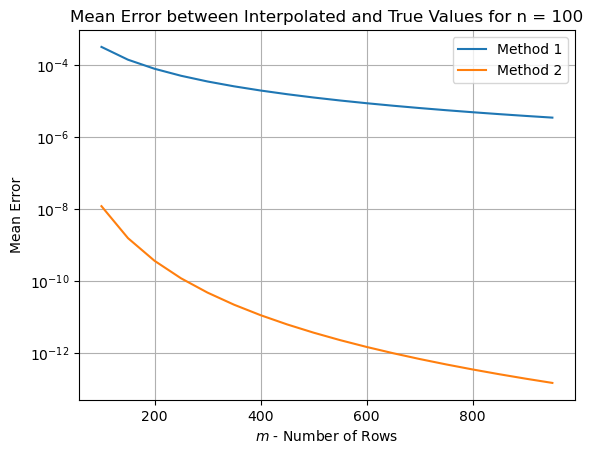

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


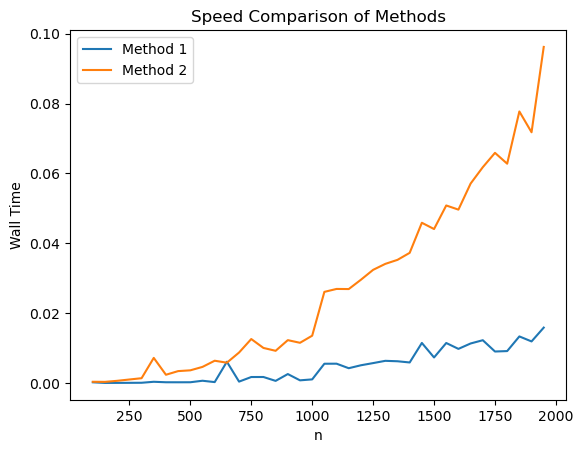

In [58]:
#===== Code for Part 2=====#
def part2(f,method=2):
    """
    Question 2.1 i)
    Input:
        f: m x n array
        method: 1 or 2, interpolation method to use
    Output:
        fI: interpolated data (using method)
    """
    #initialise fI
    m,n = f.shape
    fI = np.zeros((m-1,n)) #use/modify as needed

    if method==1:
        fI = 0.5*(f[:-1,:]+f[1:,:])
    else: #Method 2
        #initialise coeffiecients
        alpha = 0.3
        a = 1.5
        b = 0.1
        
        #coefficients for near-boundary points
        a_bc,b_bc,c_bc,d_bc = (5/16,15/16,-5/16,1/16)

        #Construct B matrix
        B=np.zeros(fI.shape)
        B[0, :] = a_bc * f[0,:] + b_bc*f[1,:] + c_bc * f[2,:] + d_bc*f[3,:]
        B[-1, :] = a_bc * f[-1,:] + b_bc*f[-2,:] + c_bc * f[-3,:] + d_bc*f[-4,:]
        B[1:-1, :] = (b / 2)*(f[3:,:] + f[:-3,:]) + (a /2) * (f[2:-1, :] + f[1:-2,:])

        #Construct A Matrix
        A = np.zeros((3, fI.shape[0]))
        A[0, 2:] = alpha
        A[1,:] = 1
        A[2,:-2] = alpha

        # Solve equations
        fI = solve_banded((1,1), A, B)

    return fI 

def part2_analyze(n, m):
    """
    Add input/output as needed
    """

    #----- Code for generating grid, use/modify/discard as needed ----#
    
    x = np.linspace(0,1,n)
    y = np.linspace(0,1,m)
    xg,yg = np.meshgrid(x,y)
    dy = y[1]-y[0]
    yI = y[:-1]+dy/2   
 
    #--------------------------------------------#
    #add code here
    xI, yI = np.meshgrid(x, yI)
    f = np.sin(2*np.pi * (xg+yg))
    # print(part2(f,method=1))
    fI_1 = part2(f, method=1)
    # print(fI_1)
    fI_2 = part2(f, method=2)
    true_vals = np.sin(2*np.pi*(xI + yI))
    error1 = np.mean(np.mean(abs(true_vals - fI_1), axis=0))
    error2 = np.mean(np.mean(abs(true_vals - fI_2), axis=0))
    return error1, error2

error_list1 = []
error_list2 = []
m_vals = np.arange(100, 1000, 50)
for m in m_vals:
    error = part2_analyze(100, int(m))
    error_list1.append(error[0])
    error_list2.append(error[1])

plt.semilogy(m_vals,error_list1)
plt.semilogy(m_vals,error_list2)
plt.legend(("Method 1", "Method 2"))
plt.xlabel("$m$ - Number of Rows")
plt.ylabel("Mean Error")
plt.grid()
plt.title("Mean Error between Interpolated and True Values for n = 100")
plt.savefig("error.png")
plt.show()


times_list = []
times_list2 = []
m_vals = np.arange(100, 2000, 50)
n = 100

for m in m_vals:
    #Generate grid
    x = np.linspace(0,1,m)
    y = np.linspace(0,1,m)
    xg,yg = np.meshgrid(x,y)
    dy = y[1]-y[0]
    yI = y[:-1]+dy/2   
    xI, yI = np.meshgrid(x, yI)
    f = np.sin(2*np.pi * (xg+yg))
    
    time1 = time.time()
    part2(f, method=1)
    time2 = time.time()
    times_list.append(time2 - time1)

    time3 = time.time()
    part2(f, method=2)
    time4 = time.time()
    times_list2.append(time4 - time3)

plt.plot(m_vals,(times_list))
plt.plot(m_vals,(times_list2))

plt.legend()
plt.xlabel("n")
plt.ylabel("Wall Time")
plt.title("Speed Comparison of Methods")
plt.legend(("Method 1", "Method 2"))
plt.savefig("speed_methods.png")
plt.show()

In [2]:
#===== Code for Part 3=====#
def part3q1(y0,alpha,beta,b,c,tf=200,Nt=800,err=1e-6,method="RK45"):
    """
    Part 3 question 1
    Simulate system of 2n nonlinear ODEs

    Input:
    y0: Initial condition, size 2*n array
    alpha,beta,b,c: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x 2*n array containing y at
            each time step including the initial condition.
    """
    
    #Set up parameters, arrays

    n = y0.size//2
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,2*n))
    yarray[0,:] = y0


    def RHS(t,y):
        """
        Compute RHS of model
        """
        #add code here
        u = y[:n];v=y[n:]
        r2 = u**2+v**2
        nu = r2*u
        nv = r2*v
        cu = np.roll(u,1)+np.roll(u,-1)
        cv = np.roll(v,1)+np.roll(v,-1)

        #formula for derivatives
        dydt = alpha*y
        dydt[:n] += beta*(cu-b*cv)-nu+c*nv+b*(1-alpha)*v
        dydt[n:] += beta*(cv+b*cu)-nv-c*nu-b*(1-alpha)*u

        return dydt

    #Solve ODE
    sol = solve_ivp(RHS, (tarray[0],tarray[-1]), y0, t_eval=tarray, method=method,atol=err,rtol=err)
    #values of the solution at each time step
    yarray = sol.y.T 
    return tarray,yarray

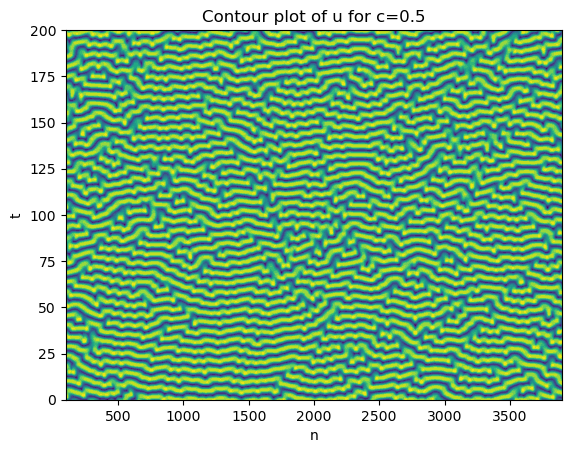

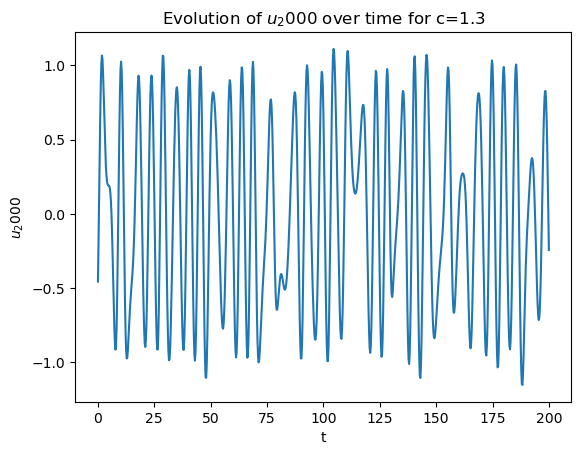

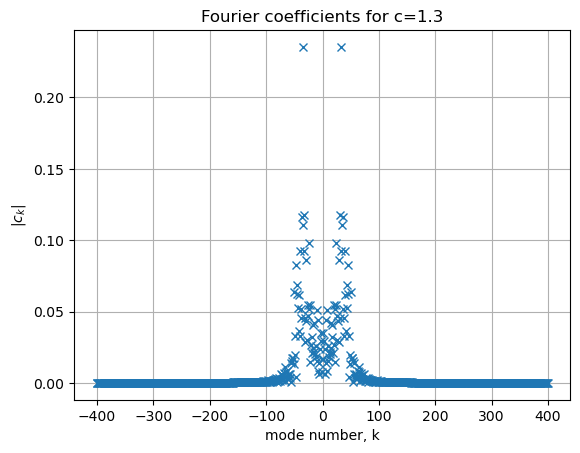

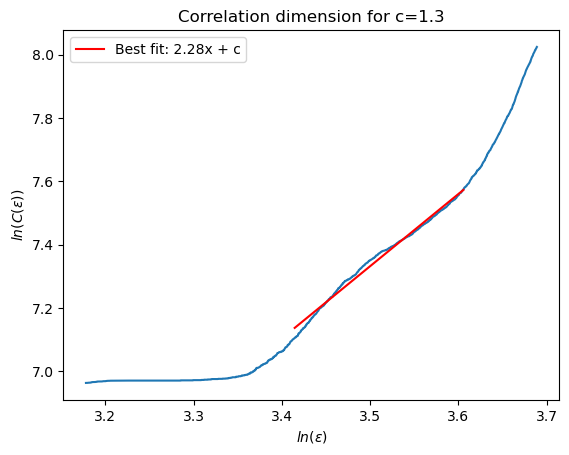

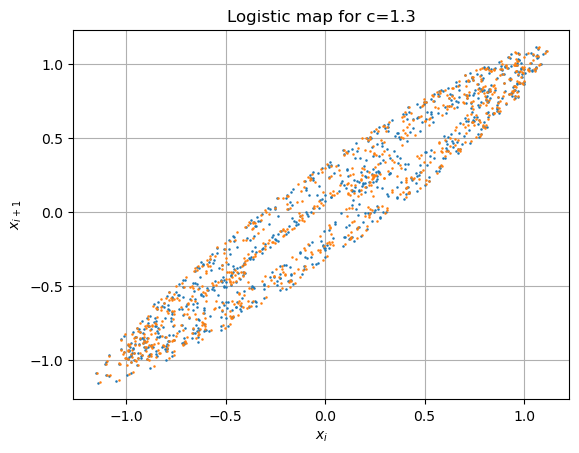

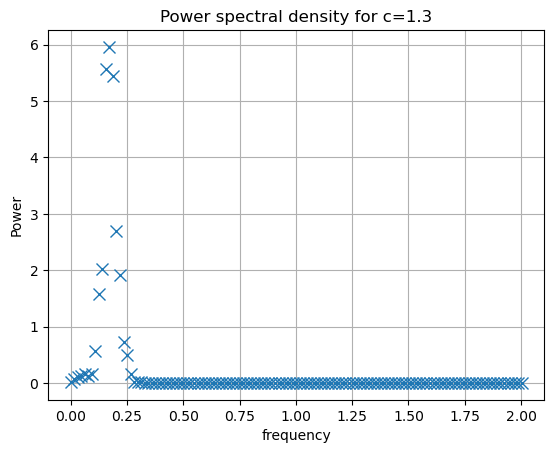

In [65]:

def part3_analyze(c, display = False):#add/remove input variables if needed
    """
    Part 3 question 1: Analyze dynamics generated by system of ODEs
    """

    #Set parameters
    beta = (25/np.pi)**2
    alpha = 1-2*beta
    b =-1.5
    n = 4000

    #Set initial condition
    L = (n-1)/np.sqrt(beta)
    k = 40*np.pi/L
    a0 = np.linspace(0,L,n)
    A0 = np.sqrt(1-k**2)*np.exp(1j*a0)
    y0 = np.zeros(2*n)
    y0[:n]=1+0.2*np.cos(4*k*a0)+0.3*np.sin(7*k*a0)+0.1*A0.real

    #---Example code for computing solution, use/modify/discard as needed---#
    #c_vals = np.linspace(0.5, 1.5, 1.3)

    t,y = part3q1(y0,alpha,beta,b,c,tf=200,Nt=2,method='RK45') #for transient, modify tf and other parameters as needed
    y0 = y[-1,:]
    t,y = part3q1(y0,alpha,beta,b,c,method='RK45',err=1e-6)
    u,v = y[:,:n],y[:,n:]
    u=u[:,100:n-100]
    v=v[:,100:n-100]
    if display:
        plt.figure()
        plt.contourf(np.arange(n)[100:n-100],t,u,20)
        plt.xlabel('n')
        plt.ylabel('t')
        plt.title("Contour plot of u for c=0.5")
        #plt.savefig("u05_contour.png")
        plt.show()

        plt.plot(t, u[:, 0])
        plt.xlabel('t')
        plt.ylabel('$u_2000$')
        plt.title(f"Evolution of $u_{2000}$ over time for c={c}")
        plt.show()

        m=801
        c_fft = np.fft.fft(u[:,0]) 
        #d = np.fft.fft(u05[:,3000]) 
        c_fft = np.fft.fftshift(c_fft)/m
        #d = np.fft.fftshift(d)/n
        k = np.arange(-m/2,m/2)
        plt.figure()
        plt.plot(k,np.abs(c_fft),'x')
        #plt.plot(k,np.abs(d),'x')
        plt.title(f'Fourier coefficients for c={c}')
        plt.xlabel('mode number, k')
        plt.ylabel('$|c_k|$')
        plt.grid()
        plt.show()

        distances = pdist(u)

        #Heaviside function
        def heaviside(x):
            if x < 0:
                return 0
            else:
                return 1
        #numpify function
        #h_vec = np.vectorize(heaviside)

        #correlation dimension
        def Corr(distances, min, max):
            C_list = []
            eps_list = np.linspace(min, max, 2500)
            for eps in eps_list:
                C = np.sum(np.where((eps - distances)>=0))
                C_list.append(np.sum(C))
            return np.log(eps_list), np.log(2*np.array(C_list)/(801 * 800))

        #plot correlation dimension
        #Values used for distances for eps and c_list have been finely tuned and depend on the c used 
        #36.5 and 45 used for c=1.5 
        #general graphs can be plot using min(distances), max(distances)
        eps, c_list = Corr(distances, 24, 40)
        plt.plot(eps, c_list)
        plt.xlabel('$ln(\epsilon)$')
        plt.ylabel('$ln(C(\epsilon))$')
        plt.title(f'Correlation dimension for c={c}')

        #plot best fit line varying start and end for the best location
        start, end = 1000, 2000  # Fit the line to points 1 to 3
        x_fit = eps[start:end+1]
        y_fit = c_list[start:end+1]

        # Fit a line to this part of the data
        coefficients = np.polyfit(x_fit, y_fit, 1)
        polynomial = np.poly1d(coefficients)

        # Generate y-values based on the fit
        y_fit_values = polynomial(x_fit)

        plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
        plt.legend()
        #plt.savefig("correlation_dim13_v2.png")
        plt.show()

        x = u[:, 0:2]
        #every pair of points 
        xpoints = x[:-1]
        ypoints = x[1:]

        plt.plot(xpoints, ypoints, 'o', markersize=0.8)
        plt.xlabel("$x_i$")
        plt.ylabel("$x_{i+1}$")
        plt.title(f"Logistic map for c={c}")
        #plt.savefig("logistic_map05.png")
        plt.grid()
        plt.show()

        f, p = welch(u[:,1000], 801/200)
        plt.plot(f, p.T, "x", markersize=8)
        plt.xlabel("frequency")
        plt.ylabel("Power")
        plt.title(f"Power spectral density for c={c}")
        plt.grid()
        #plt.savefig("psd13.png")
        plt.show()


    return t, u, v
t, u, v = part3_analyze(1.3, display=True)


In [ ]:
t15, u15, v15 = part3_analyze(1.5, display=False)

In [ ]:
t05, u05, v05 = part3_analyze(0.5, display=False)

In [ ]:
plt.plot(t, u[:, 0])
plt.xlabel('t')
plt.ylabel('$u_2000$')
plt.title("Evolution of $u_{2000}$ over time for c=1.3")
plt.show()
plt.savefig("u2000_13.png")

m=801
c = np.fft.fft(u[:,0]) 
#d = np.fft.fft(u05[:,3000]) 
c = np.fft.fftshift(c)/m
#d = np.fft.fftshift(d)/n
k = np.arange(-m/2,m/2)
plt.figure()
plt.plot(k,np.abs(c),'x')
#plt.plot(k,np.abs(d),'x')
plt.title(f'Fourier coefficients for c={c}')
plt.xlabel('mode number, k')
plt.ylabel('$|c_k|$')
plt.grid()
plt.show()
#plt.savefig("fourier_13.png")


In [ ]:
n=801
c = np.fft.fft(u15[:, 2000]) 
c = np.fft.fftshift(c)/n
k = np.arange(-n/2,n/2)
plt.figure()
plt.plot(k,np.abs(c),'x')
plt.title('Fourier coefficients for c=1.5')
plt.xlabel('mode number, k')
plt.ylabel('$|c_k|$')
plt.grid()
plt.savefig("fourier_15.png")
print(sum((abs(c)>0.05)))

In [ ]:
distances = pdist(u)

#Heaviside function
def heaviside(x):
    if x < 0:
        return 0
    else:
        return 1
#numpify function
h_vec = np.vectorize(heaviside)

#correlation dimension
def C(distances, min, max):
    C_list = []
    eps_list = np.linspace(min, max, 2500)
    for eps in eps_list:
        C = np.sum(h_vec(eps - distances))
        C_list.append(np.sum(C))
    return np.log(eps_list), np.log(2*np.array(C_list)/(801 * 800))

#plot correlation dimension
eps, c_list = C(distances, 24, 40)
plt.plot(eps, c_list)
plt.xlabel('$ln(\epsilon)$')
plt.ylabel('$ln(C(\epsilon))$')
plt.title('Correlation dimension for c=1.3')

#plot best fit line varying start and end for the best location
start, end = 1000, 2000  # Fit the line to points 1 to 3
x_fit = eps[start:end+1]
y_fit = c_list[start:end+1]

# Fit a line to this part of the data
coefficients = np.polyfit(x_fit, y_fit, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values based on the fit
y_fit_values = polynomial(x_fit)

plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
plt.legend()
plt.savefig("correlation_dim13_v2.png")
# Display the plot
plt.show()
print(coefficients[0])

In [ ]:
print(eps[1200])

In [ ]:
distances05 = pdist(u05)


def C(distances):
    C_list = []
    eps_list = np.linspace(2, 140, 2500)
    for eps in eps_list:
        C = np.sum(h_vec(eps - distances))
        C_list.append(np.sum(C))
    return np.log(eps_list), np.log(2*np.array(C_list)/(801 * 800))


#plot correlation dimension
eps, c_list = C(distances05)
plt.plot(eps, c_list)
plt.xlabel('$ln(\epsilon)$')
plt.ylabel('$ln(C(\epsilon))$')
plt.title('Correlation dimension for c=0.5')

#plot best fit line
start, end = 50, 2000  # Fit the line to points 1 to 3
x_fit = eps[start:end+1]
y_fit = c_list[start:end+1]

# Fit a line to this part of the data
coefficients = np.polyfit(x_fit, y_fit, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values based on the fit
y_fit_values = polynomial(x_fit)

plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
plt.legend()
plt.savefig("correlation_dim05.png")
# Display the plot
plt.show()
print(coefficients[0])

In [ ]:
distances15 = pdist(u15)
#plot correlation dimension
eps, c_list = C(distances15, 36.5, 45)
plt.plot(eps, c_list)
plt.xlabel('$ln(\epsilon)$')
plt.ylabel('$ln(C(\epsilon))$')
plt.title('Correlation dimension for c=1.5')

#plot best fit line
start, end = 1000, 2000  # Fit the line to points 1 to 3
x_fit = eps[start:end+1]
y_fit = c_list[start:end+1]

# Fit a line to this part of the data
coefficients = np.polyfit(x_fit, y_fit, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values based on the fit
y_fit_values = polynomial(x_fit)

plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
plt.legend()
plt.savefig("correlation_dim15.png")
# Display the plot
plt.show()
print(coefficients[0])

In [ ]:
plt.plot(eps, c_list)
plt.xlabel('$ln(\epsilon)$')
plt.ylabel('$ln(C(\epsilon))$')
plt.title('Correlation dimension for c=1.5')

#plot best fit line
start, end = 600, 2000  # Fit the line to points 1 to 3
x_fit = eps[start:end+1]
y_fit = c_list[start:end+1]

# Fit a line to this part of the data
coefficients = np.polyfit(x_fit, y_fit, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values based on the fit
y_fit_values = polynomial(x_fit)

plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
plt.legend()
#plt.savefig("correlation_dim05.png")
# Display the plot
plt.show()
print(coefficients[0])

In [59]:
x = u15[:, 0:2]
#every pair of points 
xpoints = x[:-1]
ypoints = x[1:]

plt.plot(xpoints, ypoints, 'o', markersize=0.8)
plt.xlabel("$x_i$")
plt.ylabel("$x_{i+1}$")
plt.title("Logistic map for c=0.5")
#plt.savefig("logistic_map05.png")
plt.grid()
plt.show()



"""#Extract location of maxima
dx = np.diff(x)
d2x = dx[:-1]*dx[1:]
ind = np.argwhere(d2x < 0)
#seperate out maxima and minima and plot
maxima = x[ind[0::2]+1]
minima = x[ind[1::2]+1]

#plot of maxima vs next maxima
#No clear structure
plt.plot(maxima[:-1], maxima[1:])
plt.title('Maxima vs next maxima')
plt.xlabel('$Maxima_i$')
plt.ylabel('$Maxima_{i+1}$')
plt.show()

#Peak to trough graph 
#Again no clear structure
a = np.min([len(maxima), len(minima)])
plt.plot(maxima[:a], minima[:a])
plt.xlabel('$Maxima_i$')
plt.ylabel('$Minima_{i}$')
plt.title('Maxima vs minima')
plt.show()"""

#Dimension stuff to test for chaos 
#Logistic map 

#distances = pdist(u)



def C(distances):
    C_list = []
    eps_list = np.linspace(min(distances), max(distances), 2500)
    for eps in eps_list:
        C = np.sum(np.where((eps - distances) >0))
        C_list.append(np.sum(C))
    return np.log(eps_list), np.log(2*np.array(C_list)/(801 * 800))
"""
eps, c_list = C(distances)
plt.plot(eps, c_list)
plt.xlabel('$ln(\epsilon)$')
plt.ylabel('$ln(C(\epsilon))$')
plt.title('Correlation dimension')"""

"""#400, 1300
start, end = 800, 1300  # Fit the line to points 1 to 3
x_fit = eps[start:end+1]
y_fit = c_list[start:end+1]

# Fit a line to this part of the data
coefficients = np.polyfit(x_fit, y_fit, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values based on the fit
y_fit_values = polynomial(x_fit)

plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + {1:.2f}'.format(*coefficients))

# Display the plot
plt.show()
print(coefficients[0])
"""
#A coefficient of 12 highlights that the system is chaotic.




NameError: name 'u15' is not defined

In [ ]:
f, p = welch(u[:,1000], 801/200)
plt.plot(f, p.T, "x", markersize=8)
plt.xlabel("frequency")
plt.ylabel("Power")
plt.title("Power spectral density for c=1.3")
plt.grid()
plt.savefig("psd13.png")
plt.show()


f, p = welch(u15[:,1000], 801/200)
plt.plot(f, p.T, "x", markersize=8)
plt.xlabel("frequency")
plt.ylabel("Power")
plt.title("Power spectral density for c=1.5")
plt.grid()
plt.savefig("psd15.png")
plt.show()

In [ ]:
plt.plot(u[:, 2000], v[:, 2000])
plt.show()
#phase plot
# Create a new figure
fig = plt.figure()

# Add 3D subplot
ax = plt.axes(projection='3d')

# Create a 3D scatter plot
ax.plot(u[:, 1], v[:, 1])


# Display the plot
plt.show()


(4000, 4000)


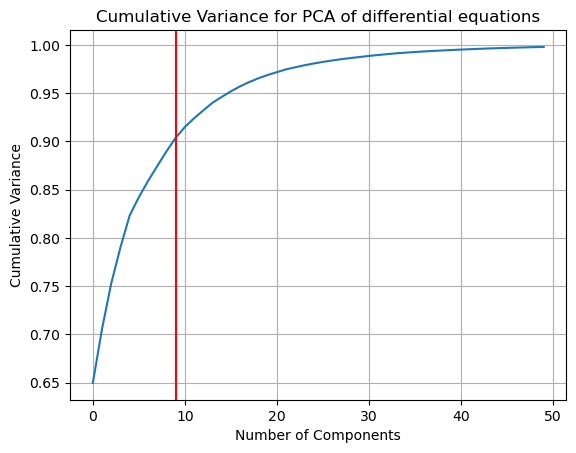

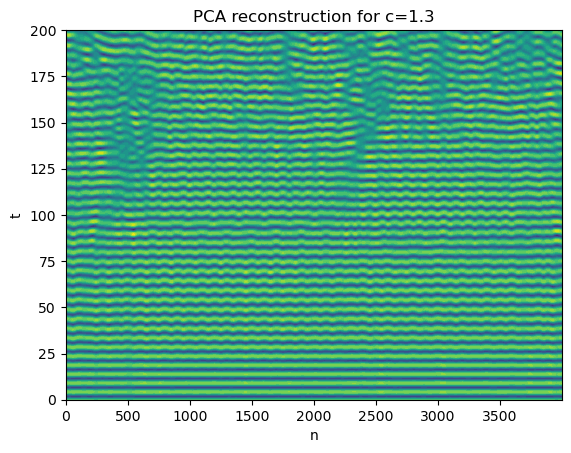

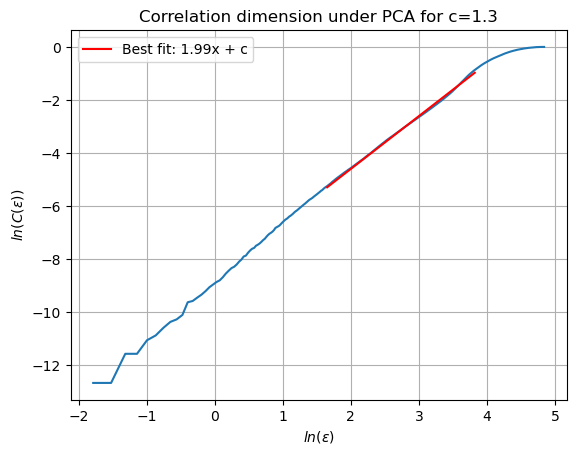

1.9932621242207353


In [51]:

def part3q2(x,c=1.0):
    """
    Code for part 3, question 2
    """
    #Set parameters
    beta = (25/np.pi)**2
    alpha = 1-2*beta
    b =-1.5
    n = 4000

    #Set initial conidition
    L = (n-1)/np.sqrt(beta)
    k = 40*np.pi/L
    a0 = np.linspace(0,L,n)
    y0 = np.zeros(2*n)
    A0 = np.sqrt(1-k**2)*np.exp(1j*a0)

    y0[:n]=1+0.2*np.cos(4*k*a0)+0.3*np.sin(7*k*a0)+0.1*A0.real

    #Compute solution
    t,y = part3q1(y0,alpha,beta,b,c,tf=20,Nt=2,method='RK45') #for transient, modify tf and other parameters as needed
    y0 = y[-1,:]
    t,y = part3q1(y0,alpha,beta,b,c,method='RK45',err=1e-6)
    A = y[:,:n]

    #Analyze code here
    #a = time.time()
    l1,v1 = np.linalg.eigh(A.T.dot(A))
    print(v1.shape)
    #l1, v1 = eigs(A.T.dot(A))
    #b = time.time()
    v2 = A.dot(v1)
    A2 = (v2[:,n-x:]).dot((v1[:,n-x:]).T)
    e = np.sum((A2.real-A)**2)
    #print(b-a)
    cum_var = np.cumsum(l1[::-1][:50])/np.sum(l1)
    plt.plot(np.arange(50), cum_var)
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Variance")
    plt.title("Cumulative Variance for PCA of differential equations")
    plt.axvline(x=9, color='r')
    plt.grid()
    #plt.savefig("cum_var_pca.png")
    #print(cum_var[19])
    t = np.linspace(0,200,801)
    plt.figure()
    plt.contourf(np.arange(n), t, A2,20)
    plt.xlabel('n')
    plt.ylabel('t')
    plt.title("PCA reconstruction for c=1.3")
    #plt.savefig("contour_pca.png")
    plt.show()

    distances = pdist(A2)


    def heaviside(x):
        if x < 0:
            return 0
        else:
            return 1

    h_vec = np.vectorize(heaviside)
    def C(distances):
        C_list = []
        eps_list = np.linspace(min(distances), max(distances), 2500)
        for eps in eps_list:
            C = np.sum(h_vec(eps - distances))
            C_list.append(np.sum(C))
        return np.log(eps_list), np.log(2*np.array(C_list)/(801 * 800))

    eps, c_list = C(distances)
    plt.plot(eps, c_list)
    plt.xlabel('$ln(\epsilon)$')
    plt.ylabel('$ln(C(\epsilon))$')
    plt.title('Correlation dimension under PCA for c=1.3')
    plt.grid()

    #400, 1300
    start, end = 100, 900  # Fit the line to points 1 to 3
    x_fit = eps[start:end+1]
    y_fit = c_list[start:end+1]

    # Fit a line to this part of the data
    coefficients = np.polyfit(x_fit, y_fit, 1)
    polynomial = np.poly1d(coefficients)

    # Generate y-values based on the fit
    y_fit_values = polynomial(x_fit)

    plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
    plt.legend()
    # Display the plot
    #plt.savefig("correlation_dim_pca.png")
    plt.show()
    print(coefficients[0])
    return A2.real,e


if __name__=='__main__':
    x=None #Included so file can be imported
    #Add code here to call functions above if needed

A2,e = part3q2(9,c=1.3)



In [44]:
print(e)


165907.98190359253
(801, 4000)


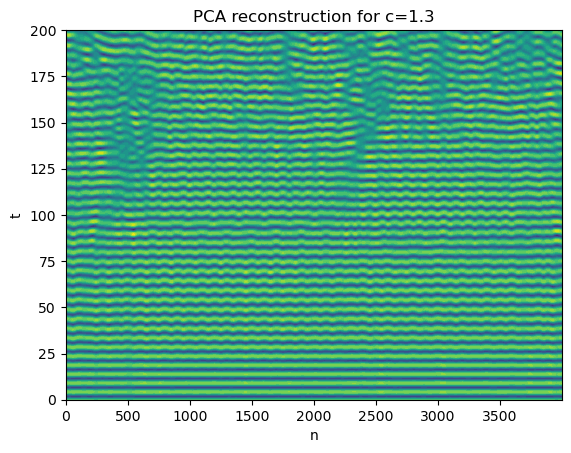

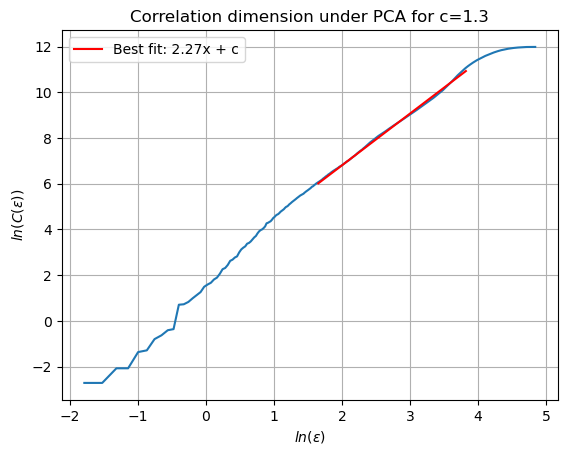

2.2655427084006283


In [63]:
n=4000
t = np.linspace(0,200,801)
plt.figure()
plt.contourf(np.arange(n), t, A2,20)
plt.xlabel('n')
plt.ylabel('t')
plt.title("PCA reconstruction for c=1.3")
plt.savefig("contour_pca.png")
plt.show()

distances = pdist(A2)


#def heaviside(x):
    #if x < 0:
        #return 0
    #else:
        #return 1

#h_vec = np.vectorize(heaviside)
def C(distances):
    C_list = []
    eps_list = np.linspace(min(distances), max(distances), 2500)
    for eps in eps_list:
        C = np.sum(np.where((eps - distances)>=0))
        C_list.append(np.sum(C))
    return np.log(eps_list), np.log(2*np.array(C_list)/(801 * 800))

eps, c_list = C(distances)
plt.plot(eps, c_list)
plt.xlabel('$ln(\epsilon)$')
plt.ylabel('$ln(C(\epsilon))$')
plt.title('Correlation dimension under PCA for c=1.3')
plt.grid()

#400, 1300
start, end = 100, 900  # Fit the line to points 1 to 3
x_fit = eps[start:end+1]
y_fit = c_list[start:end+1]

# Fit a line to this part of the data
coefficients = np.polyfit(x_fit, y_fit, 1)
polynomial = np.poly1d(coefficients)

# Generate y-values based on the fit
y_fit_values = polynomial(x_fit)

plt.plot(x_fit, y_fit_values, color='red', label='Best fit: {0:.2f}x + c'.format(*coefficients))
plt.legend()
# Display the plot
plt.savefig("correlation_dim_pca.png")
plt.show()
print(coefficients[0])

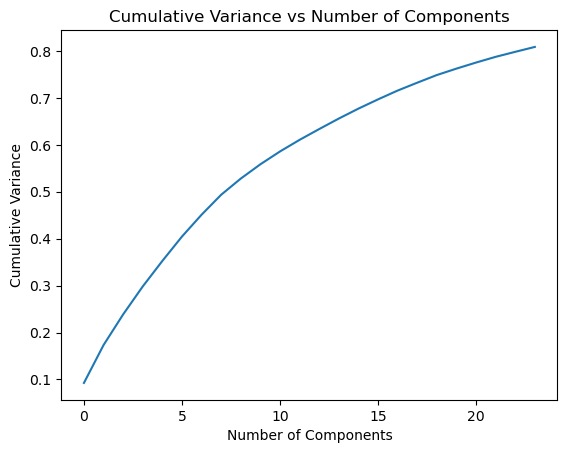

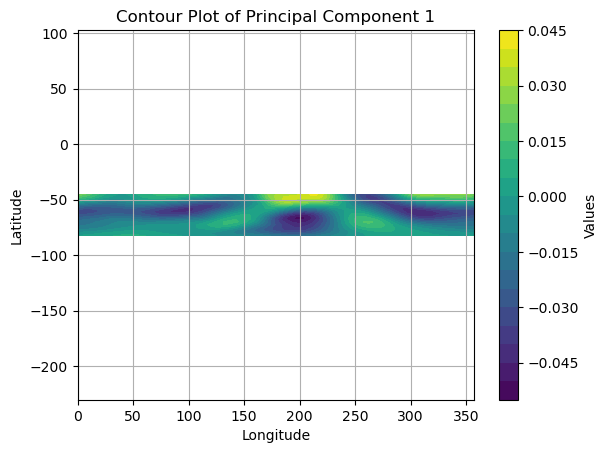

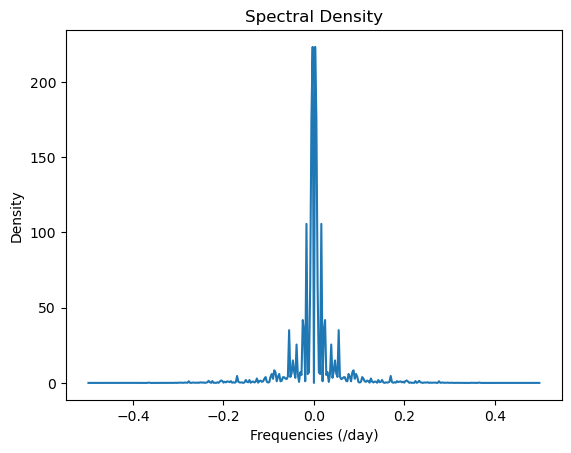

<Figure size 1000x400 with 0 Axes>

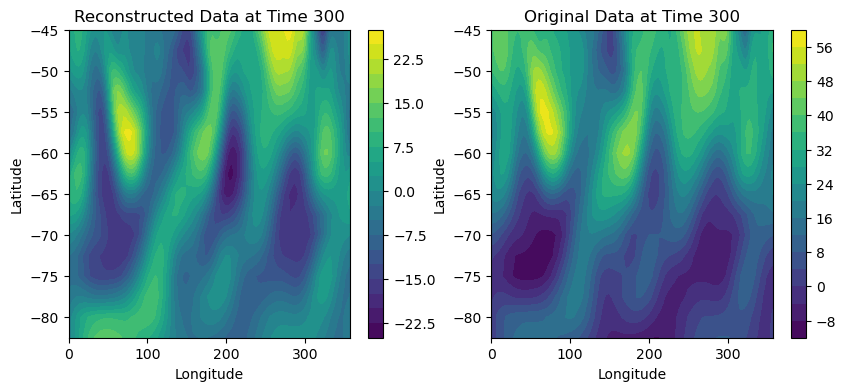

(365, 2304)
(2304, 365)
19418.376809516973


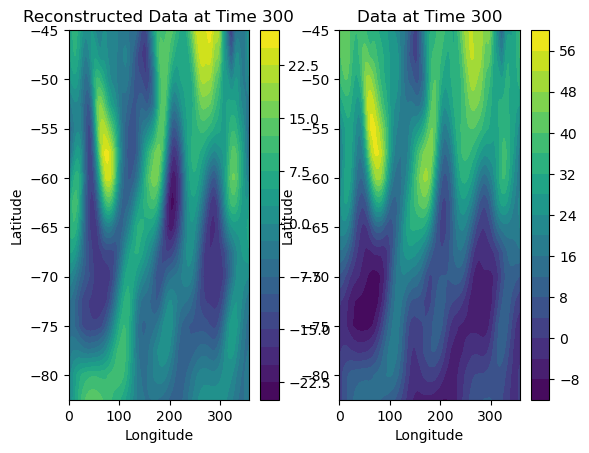

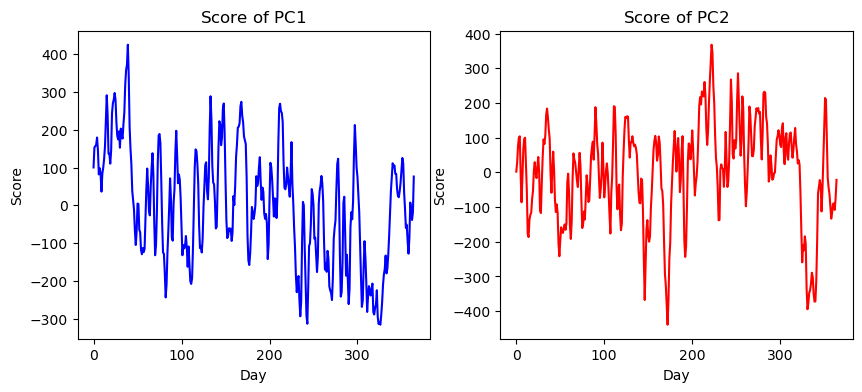

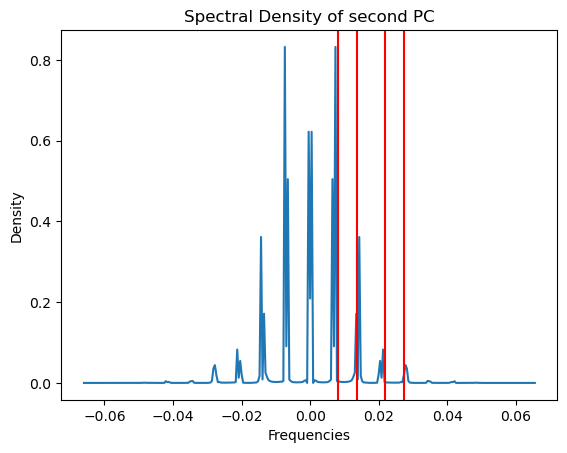

In [120]:


def plot_field(lat,lon,u,time,levels=20):
    """
    Generate contour plot of u at particular time
    Use if/as needed
    Input:
    lat,lon: latitude and longitude arrays
    u: full array of wind speed data
    time: time at which wind speed will be plotted (index between 0 and 364)
    levels: number of contour levels in plot
    """
    plt.figure()
    plt.contourf(lon,lat,u[time,:,:],levels)
    plt.axis('equal')
    plt.grid()
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    
    return None


def part1():#add input if needed
    """
    Code for part 1
    """ 

    #--- load data ---#
    d = np.load('data1.npz')
    lat = d['lat'];lon = d['lon'];u=d['u']
    #-------------------------------------#

    #Add code here 
    
    A = u.reshape(u.shape[0], -1).T
    wind_mn = np.mean(A, axis=1)
    #Create data matrix
    A_center = A.T-wind_mn 
    #SVD
    U, S, WT = np.linalg.svd(A_center)
    T = U.T
    
    var_ratio = S**2 / np.sum(S**2)
    cum_var = np.cumsum(var_ratio)
    plt.plot(cum_var[:24])
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Variance")
    plt.title("Cumulative Variance vs Number of Components")
    #plt.savefig("cum_var.png")
    plt.show()
    #Covariance matrix
    C = 1.0/(len(A_center)-1) * np.dot(A_center.T, A_center)
    #Compute evals and evecs
    eigenvalues, eigenvectors = eigsh(C,241, which="LM", return_eigenvectors=True) 

    # Sorting evals and evecs by size
    sorted_ind = np.argsort(eigenvalues)[::-1]
    eigenvalues=eigenvalues[sorted_ind]
    eigenvectors=eigenvectors[:,sorted_ind]
    pc1 = np.array([eigenvectors[:, 0].reshape((16,144))])
    #Contour plot of PC1
    contour_pc1 = plot_field(lat,lon,pc1,0)
    plt.colorbar(contour_pc1, label='Values')
    plt.title('Contour Plot of Principal Component 1')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
    
    year_avg = np.sum(np.sum(u, axis=1), axis=1)/2304
    frequencies = np.fft.fftfreq(365, d=1)
    #Fourier transform of data
    fft_vals = np.fft.fft(year_avg-np.mean(year_avg))
    
    periodogram = (np.abs(fft_vals) ** 2)/365
    #Reorder periodogram as values not in correct order when returned
    p_gram_shifted = np.fft.fftshift(periodogram)
    frequencies_shifted = np.fft.fftshift(frequencies)
    plt.plot(frequencies_shifted,p_gram_shifted)
    plt.title("Spectral Density")
    plt.xlabel("Frequencies (/day)")
    plt.ylabel("Density")
    plt.show()

    #Reconstruct data matrix
    A_pca = np.dot(A_center, eigenvectors)
    A_reconstructed = np.dot(A_pca, eigenvectors.T)
    k=300
    plt.figure(figsize=(10, 4))

    k=300
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.contourf(lon, lat, (A_reconstructed[k].reshape(u.shape[1:])),levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Reconstructed Data at Time {}'.format(k))
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.contourf(lon, lat, u[k],levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Original Data at Time {}'.format(k))
    plt.colorbar()

    plt.show()

    plt.subplot(1, 2, 1)
    plt.contourf(lon, lat, A_reconstructed[k].reshape(u.shape[1:]),levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Reconstructed Data at Time {}'.format(k))
    plt.colorbar()
 
    plt.subplot(1, 2, 2)
    plt.contourf(lon, lat, u[k],levels=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Data at Time {}'.format(k))
    plt.colorbar()
    print(A_reconstructed.shape)
    print(A.shape)
    difference = np.linalg.norm(A_reconstructed.T-A)
    print(difference)

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

    # Plot the first subplot
    axs[0].plot(range(365), np.dot(A_center, eigenvectors[:,0]), color='blue')
    axs[0].set_title('Score of PC$1$')
    axs[0].set_xlabel('Day')
    axs[0].set_ylabel('Score')

    # Plot the second subplot
    axs[1].plot(range(365), np.dot(A_center, eigenvectors[:,1]), color='red')
    axs[1].set_title('Score of PC$2$')
    axs[1].set_xlabel('Day')
    axs[1].set_ylabel('Score')

    plt.show()

    year_avg = np.sum(np.sum(u, axis=1), axis=1)/2304
    frequencies = np.fft.fftfreq(2304, d=1)
    #Fourier transform of data
    fft_vals = np.fft.fft(eigenvectors[:,1])
    periodogram = (np.abs(fft_vals) ** 2)/365
    #Reorder periodogram as values not in correct order when returned
    p_gram_shifted = np.fft.fftshift(periodogram)
    frequencies_shifted = np.fft.fftshift(frequencies)
    plt.plot(frequencies_shifted[1000:-1000],p_gram_shifted[1000:-1000])
    plt.title("Spectral Density of second PC")
    plt.xlabel("Frequencies")
    plt.ylabel("Density")
    plt.axvline(x = 5/365, color='r')
    plt.axvline(x = 3/365, color='r')
    plt.axvline(x = 8/365, color='r')
    plt.axvline(x = 10/365, color='r')


    plt.savefig("spectral_density_comp1.png")
    plt.show()

part1()


In [ ]:
  fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

    # Plot the first subplot
    axs[0].plot(range(365), np.dot(A_center, eigenvectors[:,0]), color='blue')
    axs[0].set_title('Score of PC$1$')
    axs[0].set_xlabel('Day')
    axs[0].set_ylabel('Score')

    # Plot the second subplot
    axs[1].plot(range(365), np.dot(A_center, eigenvectors[:,1]), color='red')
    axs[1].set_title('Score of PC$2$')
    axs[1].set_xlabel('Day')
    axs[1].set_ylabel('Score')

    plt.show()
